# Price catalog

## [Download worked project](../../_static/generated/price-catalog-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/price-catalog)

Public administrations always need to know the up-to-date prices of all the various items they need, so to place appropriate orders to contractors. We'll analyze the dataset [EPPAT-2018-new-compact.csv](EPPAT-2018-new-compact.csv), which is the price list for all products and services the Autonomous Province of Trento (Italy) may require. 

Data source: [dati.trentino.it](https://dati.trentino.it/dataset/prezziario-dei-lavori-pubblici-della-provincia-autonoma-di-trento), released under [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it) licence.

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
price-catalog-prj
    price-catalog.ipynb
    price-catalog-sol.ipynb
    EPPAT-2018-new-compact.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `price-catalog.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## The dataset

Let's have a quick look at the file [EPPAT-2018-new-compact.csv](EPPAT-2018-new-compact.csv). We will show examples with pandas, but it is not required to solve the exercises.

<div class="alert alert-warning">
    
**DO NOT WASTE TIME LOOKING AT THE WHOLE DATASET!**
    
The dataset is quite complex, please focus on the few examples we provide
</div>

In [1]:
import pandas as pd   
import numpy as np    

pd.set_option('display.max_colwidth', None)
df = pd.read_csv('EPPAT-2018-new-compact.csv', encoding='latin-1')

The dataset contains several columns, but we will consider the following ones:

In [2]:
df=df[['Codice Prodotto','Descrizione Breve Prodotto','Categoria','Prezzo']]
df[:22]

,Codice Prodotto,Descrizione Breve Prodotto,Categoria,Prezzo
0,A.02.35.0050,ATTREZZATURA PER INFISSIONE PALI PILOTI,NaN,NaN
1,A.02.35.0050.010,Attrezzatura per infissione pali piloti.,Noli e trasporti,109.09
2,A.02.40,ATTREZZATURE SPECIALI,NaN,NaN
3,A.02.40.0010,POMPA COMPLETA DI MOTORE,NaN,NaN
4,A.02.40.0010.010,fino a mm 50.,Noli e trasporti,2.21
5,A.02.40.0010.020,oltre mm 50 fino a mm 100.,Noli e trasporti,3.36
6,A.02.40.0010.030,oltre mm 100 fino a mm 150.,Noli e trasporti,4.42
7,A.02.40.0010.040,oltre mm 150 fino a mm 200.,Noli e trasporti,5.63
8,A.02.40.0010.050,oltre mm 200.,Noli e trasporti,6.84
9,A.02.40.0020,GRUPPO ELETTROGENO,NaN,NaN


**Pompa completa a motore Example**

If we look at the dataset, in some cases we can spot a pattern (rows 3 to 8 included):

In [3]:
df[3:12]

,Codice Prodotto,Descrizione Breve Prodotto,Categoria,Prezzo
3,A.02.40.0010,POMPA COMPLETA DI MOTORE,NaN,NaN
4,A.02.40.0010.010,fino a mm 50.,Noli e trasporti,2.21
5,A.02.40.0010.020,oltre mm 50 fino a mm 100.,Noli e trasporti,3.36
6,A.02.40.0010.030,oltre mm 100 fino a mm 150.,Noli e trasporti,4.42
7,A.02.40.0010.040,oltre mm 150 fino a mm 200.,Noli e trasporti,5.63
8,A.02.40.0010.050,oltre mm 200.,Noli e trasporti,6.84
9,A.02.40.0020,GRUPPO ELETTROGENO,NaN,NaN
10,A.02.40.0020.010,fino a 10 KW,Noli e trasporti,8.77
11,A.02.40.0020.020,oltre 10 fino a 13 KW,Noli e trasporti,9.94


We see the first column holds product codes. If two rows share a code prefix, they belong to the same product type. As an example, we can take product `A.02.40.0010`, which has `'POMPA COMPLETA A MOTORE'` as description ('Descrizione Breve Prodotto' column). The first row is basically telling us the product type, while the following rows are specifying several products of the same type (notice they all share the `A.02.40.0010` prefix code until `'GRUPPO ELETTROGENO'` excluded). Each description specifies a range of values for that product: _fino a_ means _until to_ , and _oltre_ means _beyond_.

Notice that:

- first row has only one number
- intermediate rows have two numbers
- last row of the product series (row 8) has only one number and contains the word _oltre_ ( _beyond_ )
  (in some other cases, last row of product series may have two numbers)

## A1 extract_bounds

Write a function that given a Descrizione Breve Prodotto **as a single string** extracts the range contained within as a tuple.

If the string contains only one number `n`:

- if it contains `UNTIL` ( 'fino' ) it is considered a first row with bounds `(0,n)`
- if it contains `BEYOND` ( 'oltre' ) it is considered a last row with bounds `(n, math.inf)`

**DO NOT** use constants like measure units 'mm', 'KW', etc in the code

In [4]:
import math 

#use this list to rmeove unneeded stuff
PUNCTUATION=[',','-','.','%']
UNTIL = 'fino'
BEYOND = 'oltre'

def extract_bounds(text):
    
   
    
    fixed_text = text
    for pun in PUNCTUATION:
        fixed_text = fixed_text.replace(pun, ' ')
    words = fixed_text.split()
    i = 0
    left = None
    right = None
    
    while i < len(words) and (not left or not right):        
        
        if words[i].isdigit():            
            if not left:
                left = int(words[i])
            elif not right:
                right = int(words[i])
        i += 1
        
    if not right:
        if BEYOND in text:
            right = math.inf
        else:
            right = left
            left = 0            
        
    return (left,right)    
    

assert extract_bounds('fino a mm 50.') == (0,50)
assert extract_bounds('oltre mm 50 fino a mm 100.') == (50,100)
assert extract_bounds('oltre mm 200.') == (200, math.inf)
assert extract_bounds('da diametro 63 mm a diametro 127 mm') == (63, 127)
assert extract_bounds('fino a 10 KW') ==  (0,10)
assert extract_bounds('oltre 156 fino a 184 KW') ==  (156,184)
assert extract_bounds('fino a 170 A, avviamento elettrico') == (0,170)
assert extract_bounds('oltre 170 A fino a 250 A, avviamento elettrico') == (170, 250)
assert extract_bounds('oltre 300 A, avviamento elettrico')  == (300, math.inf)
assert extract_bounds('tetti piani o con bassa pendenza - fino al 10%') == (0,10)
assert extract_bounds('tetti a media pendenza - oltre al 10% e fino al 45%') == (10,45)
assert extract_bounds('tetti ad alta pendenza - oltre al 45%') == (45, math.inf)

In [4]:
import math 

#use this list to rmeove unneeded stuff
PUNCTUATION=[',','-','.','%']
UNTIL = 'fino'
BEYOND = 'oltre'

def extract_bounds(text):
    raise Exception('TODO IMPLEMENT ME !')

assert extract_bounds('fino a mm 50.') == (0,50)
assert extract_bounds('oltre mm 50 fino a mm 100.') == (50,100)
assert extract_bounds('oltre mm 200.') == (200, math.inf)
assert extract_bounds('da diametro 63 mm a diametro 127 mm') == (63, 127)
assert extract_bounds('fino a 10 KW') ==  (0,10)
assert extract_bounds('oltre 156 fino a 184 KW') ==  (156,184)
assert extract_bounds('fino a 170 A, avviamento elettrico') == (0,170)
assert extract_bounds('oltre 170 A fino a 250 A, avviamento elettrico') == (170, 250)
assert extract_bounds('oltre 300 A, avviamento elettrico')  == (300, math.inf)
assert extract_bounds('tetti piani o con bassa pendenza - fino al 10%') == (0,10)
assert extract_bounds('tetti a media pendenza - oltre al 10% e fino al 45%') == (10,45)
assert extract_bounds('tetti ad alta pendenza - oltre al 45%') == (45, math.inf)

## A2 extract_product

Write a function that given a `filename`, a `code` and a `unit`, parses the csv until it finds the corresponding code and RETURNS **one** dictionary with relevant information for that product

- _Prezzo_ ( _price_ ) **MUST be converted to float**
- **USE a** `csv.DictReader` **for parsing**, [see example](https://en.softpython.org/formats/formats2-csv-sol.html#Reading-as-dictionaries)
- **USE** `latin-1` **as encoding**



In [5]:
# Suppose we want to get all info about A.02.40.0010 prefix:
df[3:12]

,Codice Prodotto,Descrizione Breve Prodotto,Categoria,Prezzo
3,A.02.40.0010,POMPA COMPLETA DI MOTORE,NaN,NaN
4,A.02.40.0010.010,fino a mm 50.,Noli e trasporti,2.21
5,A.02.40.0010.020,oltre mm 50 fino a mm 100.,Noli e trasporti,3.36
6,A.02.40.0010.030,oltre mm 100 fino a mm 150.,Noli e trasporti,4.42
7,A.02.40.0010.040,oltre mm 150 fino a mm 200.,Noli e trasporti,5.63
8,A.02.40.0010.050,oltre mm 200.,Noli e trasporti,6.84
9,A.02.40.0020,GRUPPO ELETTROGENO,NaN,NaN
10,A.02.40.0020.010,fino a 10 KW,Noli e trasporti,8.77
11,A.02.40.0020.020,oltre 10 fino a 13 KW,Noli e trasporti,9.94


A call to 

```python
pprint(extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm'))
```

Must produce: 
    
```python
{'category': 'Noli e trasporti',
 'code': 'A.02.40.0010',
 'description': 'POMPA COMPLETA DI MOTORE',
 'measure_unit': 'mm',
 'models': [{'bounds': (0, 50),        'price': 2.21, 'subcode': '010'},
            {'bounds': (50, 100),      'price': 3.36, 'subcode': '020'},
            {'bounds': (100, 150),     'price': 4.42, 'subcode': '030'},
            {'bounds': (150, 200),     'price': 5.63, 'subcode': '040'},
            {'bounds': (200, math.inf),'price': 6.84, 'subcode': '050'}]}
```

Notice that if we append `subcode` to `code` (with a dot) we obtain the full product code.

In [6]:

import csv
from pprint import pprint

def extract_product(filename, code, measure_unit): 
    
    
    c = 0
    with open(filename, encoding='latin-1', newline='') as f:    
        my_reader = csv.DictReader(f, delimiter=',')   # Notice we now used DictReader
        for d in my_reader:            
            
            if d['Codice Prodotto'] == code:
                ret = {}            
                ret['description'] = d['Descrizione Breve Prodotto']
                ret['code'] = code
                ret['measure_unit'] = measure_unit
                ret['models'] = []
                
            if d['Codice Prodotto'].startswith(code + '.'):                                
                ret['category'] = d['Categoria']
                subdiz = {}
                subdiz['price'] = float(d['Prezzo'])
                subdiz['subcode'] = d['Codice Prodotto'][len(code)+1:]
                subdiz['bounds'] = extract_bounds(d['Descrizione Breve Prodotto'])                
                ret['models'].append(subdiz)
                
    return ret
    

pprint(extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm'))
assert extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm') == \
    {'category': 'Noli e trasporti',
     'code': 'A.02.40.0010',
     'description': 'POMPA COMPLETA DI MOTORE',
     'measure_unit': 'mm',
     'models': [{'bounds': (0, 50),        'price': 2.21, 'subcode': '010'},
                {'bounds': (50, 100),      'price': 3.36, 'subcode': '020'},
                {'bounds': (100, 150),     'price': 4.42, 'subcode': '030'},
                {'bounds': (150, 200),     'price': 5.63, 'subcode': '040'},
                {'bounds': (200, math.inf),'price': 6.84, 'subcode': '050'}]}

#pprint(extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0020', 'KW'))
#pprint(extract_product('EPPAT-2018-new-compact.csv', 'B.02.10.0042', 'mm'))
#pprint(extract_product('EPPAT-2018-new-compact.csv','B.30.10.0010', '%'))

{'category': 'Noli e trasporti',
 'code': 'A.02.40.0010',
 'description': 'POMPA COMPLETA DI MOTORE',
 'measure_unit': 'mm',
 'models': [{'bounds': (0, 50), 'price': 2.21, 'subcode': '010'},
            {'bounds': (50, 100), 'price': 3.36, 'subcode': '020'},
            {'bounds': (100, 150), 'price': 4.42, 'subcode': '030'},
            {'bounds': (150, 200), 'price': 5.63, 'subcode': '040'},
            {'bounds': (200, inf), 'price': 6.84, 'subcode': '050'}]}


In [6]:

import csv
from pprint import pprint

def extract_product(filename, code, measure_unit): 
    raise Exception('TODO IMPLEMENT ME !')

pprint(extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm'))
assert extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm') == \
    {'category': 'Noli e trasporti',
     'code': 'A.02.40.0010',
     'description': 'POMPA COMPLETA DI MOTORE',
     'measure_unit': 'mm',
     'models': [{'bounds': (0, 50),        'price': 2.21, 'subcode': '010'},
                {'bounds': (50, 100),      'price': 3.36, 'subcode': '020'},
                {'bounds': (100, 150),     'price': 4.42, 'subcode': '030'},
                {'bounds': (150, 200),     'price': 5.63, 'subcode': '040'},
                {'bounds': (200, math.inf),'price': 6.84, 'subcode': '050'}]}

#pprint(extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0020', 'KW'))
#pprint(extract_product('EPPAT-2018-new-compact.csv', 'B.02.10.0042', 'mm'))
#pprint(extract_product('EPPAT-2018-new-compact.csv','B.30.10.0010', '%'))

## A3 plot_product

Implement following function that takes a dictionary as output by previous `extract_product` and shows its price ranges.

- pay attention to display title and axis labels as shown, using input data and **not** constants.
- in case last range holds a `math.inf`, show a `>` sign
- **if you don't have a working** `extract_product`, **just copy paste data from previous asserts**.

```python
>>> extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm')
```
![expected-pompa-a-motore.png](expected-pompa-a-motore.png)

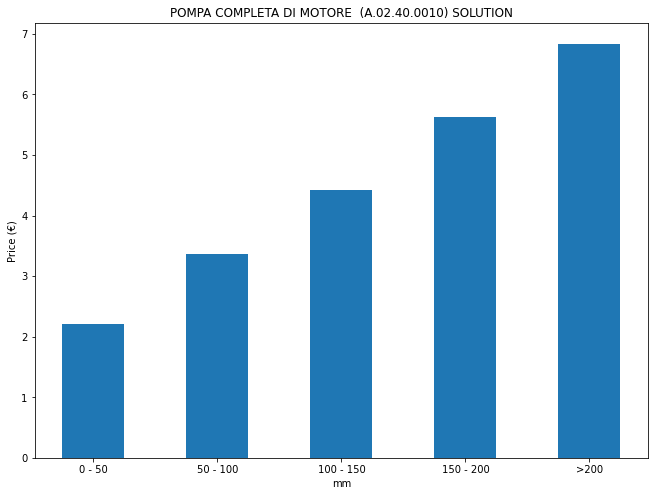

In [7]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
    
def plot_product(product):
    
    
    models = product['models']
    xs = np.arange(len(models))
    ys = [ model["price"] for model in models]
    

    plt.bar(xs, ys, 0.5, align='center')

    plt.title('%s  (%s) SOLUTION' % (product['description'], product['code']) )
    
    ticks = []
    for model in models:
        bounds = model["bounds"]
        if bounds[1] == math.inf:
            ticks.append('>%s' % bounds[0])
        else:
            ticks.append('%s - %s' % (bounds[0], bounds[1]))                

    plt.xticks(xs, ticks)
    plt.gcf().set_size_inches(11,8)    
    plt.xlabel(product['measure_unit'])
    plt.ylabel('Price (€)')    
    
    plt.show()
    

product = extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm')
#product = extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0020', 'KW')
#product = extract_product('EPPAT-2018-new-compact.csv', 'B.02.10.0042', 'mm')
#product = extract_product('EPPAT-2018-new-compact.csv','B.30.10.0010', '%')

plot_product(product)

In [7]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
    
def plot_product(product):
    raise Exception('TODO IMPLEMENT ME !')

product = extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0010', 'mm')
#product = extract_product('EPPAT-2018-new-compact.csv', 'A.02.40.0020', 'KW')
#product = extract_product('EPPAT-2018-new-compact.csv', 'B.02.10.0042', 'mm')
#product = extract_product('EPPAT-2018-new-compact.csv','B.30.10.0010', '%')

plot_product(product)